In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
learning_rate = 5

In [3]:
# sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# derivative of sigmoid activation function
def dsigmoid(x):
    return x * (1 - x)

# relu activation function
def relu(x):
    return np.maximum(0, x)

# derivative of relu activation function
def drelu(x):
    return np.where(x > 0, 1, 0)

In [4]:
# exclusive or function (true when number of true outputs is odd)
inputs = np.array([
    [0, 1], 
    [1, 0], 
    [0, 0], 
    [1, 1]
])
target_output = np.array([
    [1], 
    [1], 
    [0], 
    [0]
])

In [5]:
np.random.seed(1)
# initialize weights
weights_1 = 2 * np.random.randn(2,2) - 1
weights_2 = 2 * np.random.randn(2,1) - 1
#weights_1 = np.random.randn(2,2)*np.sqrt(2/4)
#weights_2 = np.random.randn(2,1)*np.sqrt(2/3)

# initialize bias
bias_1 = 1
bias_2 = 1

In [6]:
#takes in the inputs and adjusts the weights accordingly
def train(batch):
    global weights_2
    global weights_1
    global bias_1
    global bias_2

    ## feedforward
    layer_1_output = sigmoid(np.dot(batch, weights_1) + bias_1)
    output = sigmoid(np.dot(layer_1_output, weights_2) + bias_2)

    ## backprop
    
    # output layer
    dcost_dpred = target_output - output
    dpred_dz = dsigmoid(output)
    dz_dw2 = layer_1_output
    
    
    dcost_dw2 = np.dot(dz_dw2.T, dcost_dpred * dpred_dz)
    dcost_b2 = dcost_dpred * dpred_dz
    
    dcost_doutput1 = np.dot(dcost_dpred * dpred_dz, weights_2.T)
    doutput1_dz = dsigmoid(layer_1_output)
    dz_dw1 = batch
    
    dcost_dw1 = np.dot(dz_dw1.T, dcost_doutput1 * doutput1_dz)
    dcost_b1 = dcost_doutput1 * doutput1_dz
    
    # update weights
    weights_2 += dcost_dw2 * learning_rate
    weights_1 += dcost_dw1 * learning_rate
    
    # update biases
    bias_2 += np.average(dcost_b2) * learning_rate
    bias_1 += np.average(dcost_b1) * learning_rate

    return dcost_dpred, output

In [7]:
error_list = []
index = []
for i in range(2001):
    nn_error, nn_output = train(inputs)
    mse = np.average(nn_error * nn_error)
    error_list.append(mse)
    index.append(i)
    #if (i % 4000) == 0:
        #print(mse)
        #print(nn_output)

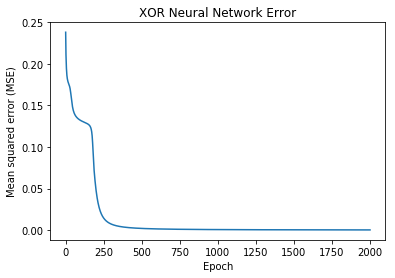

In [8]:
# plot mse vs. epoch
plt.plot(index, error_list)
plt.xlabel('Epoch')
plt.ylabel('Mean squared error (MSE)')
plt.title('XOR Neural Network Error')
plt.show()

In [9]:
error_list[2000] #0.00026032175346313156

0.00026032175346313156